## Problem:  
predict the amount of water flowing out of a dam 
using the change of water level in a reservoir

In [1]:
#load libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import fmin_cg

In [2]:
#config libs
pd.set_option('max_rows', 5)
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 4

In [3]:
#load data from .mat file
data = loadmat('ex5data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [28]:
#initialize train, validation and test data
X_train, y_train = data['X'], data['y']
X_test, y_test = data['Xtest'], data['ytest']
X_valid, y_valid = data['Xval'], data['yval']
X_train

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945],
       [ -8.94145794],
       [ 15.30779289],
       [-34.70626581],
       [  1.38915437],
       [-44.38375985],
       [  7.01350208],
       [ 22.76274892]])

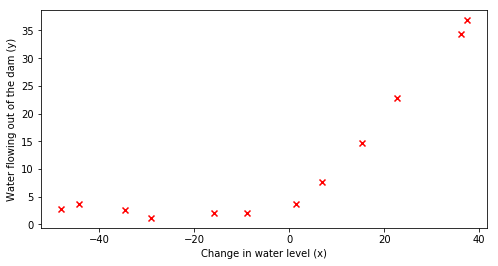

In [29]:
#visualize train data
def draw_data(X, y):
    plt.scatter(x=X, y=y, marker='x', c='red')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.show()
    
draw_data(X_train, y_train)

In [8]:
#set model variables
m, n = X_train.shape
theta = [1, 1]
lmbda = 1
(m, n)

(12, 1)

In [30]:
#insert intercept term into train data
X_train_int = np.insert(X_train, 0, 1, axis=1)
X_train_int

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [31]:
#insert intercept term into validation and test data
X_valid_int = np.insert(X_valid, 0, 1, axis=1)
X_test_int = np.insert(X_test, 0, 1, axis=1)
X_test_int

array([[  1.        , -33.31800399],
       [  1.        , -37.91216403],
       [  1.        , -51.20693795],
       [  1.        ,  -6.13259585],
       [  1.        ,  21.26118327],
       [  1.        , -40.31952949],
       [  1.        , -14.54153167],
       [  1.        ,  32.55976024],
       [  1.        ,  13.39343255],
       [  1.        ,  44.20988595],
       [  1.        ,  -1.14267768],
       [  1.        , -12.76686065],
       [  1.        ,  34.05450539],
       [  1.        ,  39.22350028],
       [  1.        ,   1.97449674],
       [  1.        ,  29.6217551 ],
       [  1.        , -23.66962971],
       [  1.        ,  -9.01180139],
       [  1.        , -55.94057091],
       [  1.        , -35.70859752],
       [  1.        ,   9.51020533]])

In [17]:
def h(X, theta):
    """ hypothesis function """
    return np.dot(X, theta)

In [18]:
def costFunction(theta, X, y, m, lmbda):
    hypothesis = h(X, theta).reshape((m, 1)) # pack each element in array 
    J = float(1/(2*m) * np.dot((hypothesis - y).T, (hypothesis - y)))
    regularization = lmbda/(2*m) * np.dot(theta[1:], theta[1:])
    
    return J + regularization

In [32]:
#expected cost 303.993
costFunction(theta, X_train_int, y_train, m, lmbda)

303.9931922202643

In [21]:
def gradient(theta, X, y, m, lmbda):
    hypothesis = h(X, theta).reshape((m, 1))
    tmp = np.dot((hypothesis - y).T, X)
    regularization = np.multiply(theta[1:], float(lmbda / m))

    return (1/m * tmp + regularization).flatten()

In [33]:
#expected gradient [-15.30; 598.250]
gradient(theta, X_train_int, y_train, m, lmbda)

array([-15.21968234, 598.25074417])

In [35]:
#compute the optimal values of θ
theta_opt = fmin_cg(costFunction, theta, gradient, args=(X_train_int, y_train, m, lmbda))
theta_opt

         Current function value: 22.380026
         Iterations: 4
         Function evaluations: 24
         Gradient evaluations: 13


array([13.05611566,  0.36753119])

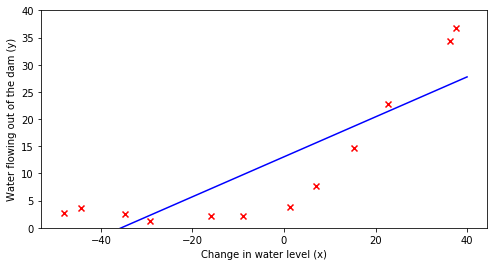

In [42]:
#plot the best fit line
x = np.linspace(-40, 40)
plt.ylim(0, 40)
plt.plot(x, theta_opt[1]*x+theta_opt[0], c='blue')
draw_data(X_train, y_train)